# Import all the required Libraries




In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [153]:
#print the tensor flow version
print(tf.__version__)

2.1.0


In [154]:
#read the data from the local file
df = pd.read_csv("C:\\Users\\tejan\\Downloads\\practicedata\\Molecular_Activity.txt",  sep = "\t")
df.describe().transpose()   

,count,mean,std,min,25%,50%,75%,max
prop_1,540.0,4.087454,1.356507,1.792560,2.98670,3.939100,5.01878,7.770
prop_2,540.0,65.960121,14.918107,41.810880,54.33076,63.727060,75.00800,115.848
prop_4,540.0,4.984520,1.709397,1.620288,4.30445,5.252841,5.96910,10.020
Activity,540.0,0.683333,0.465608,0.000000,0.00000,1.000000,1.00000,1.000


In [155]:
df.head()

,prop_1,prop_2,prop_3,prop_4,Activity
0,4.06,71.01,57.2,5.82,1
1,3.63,65.62,52.68,5.44,1
2,3.63,68.90,58.29,6.06,1
3,4.11,75.59,62.81,6.44,1
4,4.00,70.86,58.05,6.06,1


In [156]:
#check the target variable class proportion
df.Activity.value_counts()

1    369
0    171
Name: Activity, dtype: int64

In [157]:
#Look at the column types in the data. Prop_3 is not numeric
df.dtypes

prop_1      float64
prop_2      float64
prop_3       object
prop_4      float64
Activity      int64
dtype: object

Looks like prop_3 is not numeric. So, convert it to numeric variable and drop any null values

In [158]:
df["prop_3"] = pd.to_numeric(df["prop_3"],errors='coerce')
df.dropna(inplace = True)

In [159]:
df.describe().transpose()  
#prop_3 is now numeric value. We have dropped one row. (count of rows deceased from 540 to 539)

,count,mean,std,min,25%,50%,75%,max
prop_1,539.0,4.082944,1.353708,1.792560,2.985800,3.938200,5.01042,7.770
prop_2,539.0,65.970638,14.929961,41.810880,54.318240,63.763920,75.00800,115.848
prop_3,539.0,49.738279,9.384170,28.694540,43.231129,48.096480,55.82527,83.300
prop_4,539.0,4.984265,1.710975,1.620288,4.298540,5.252841,5.96910,10.020
Activity,539.0,0.682746,0.465840,0.000000,0.000000,1.000000,1.00000,1.000


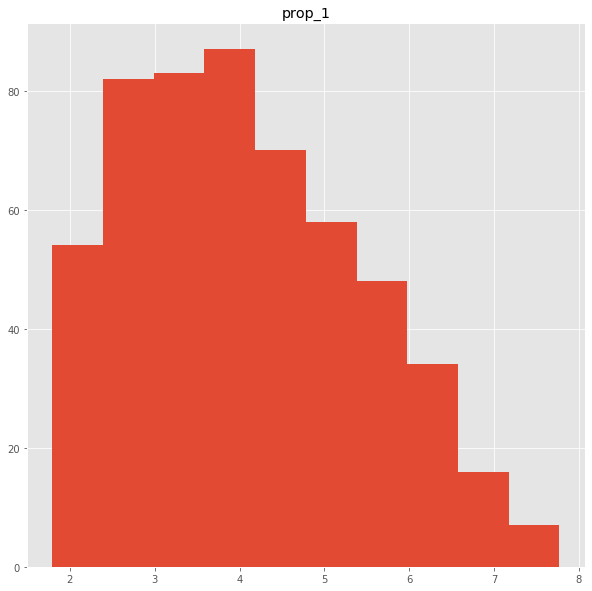

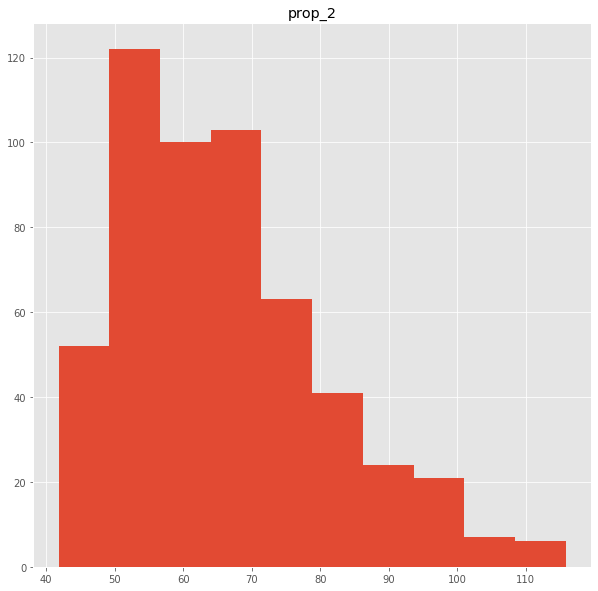

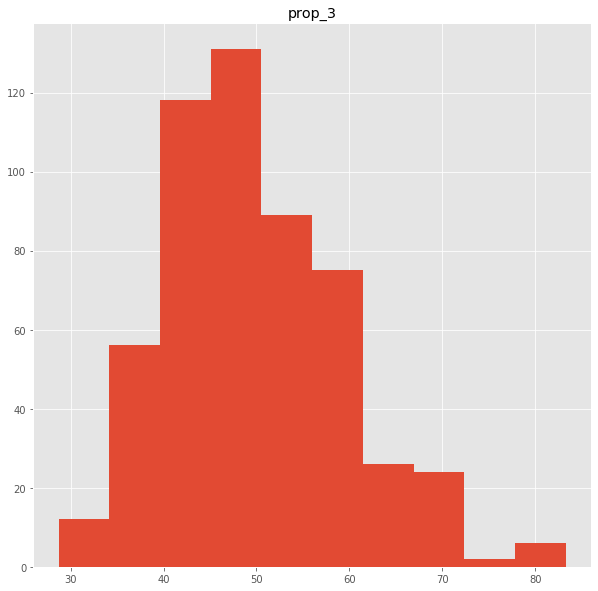

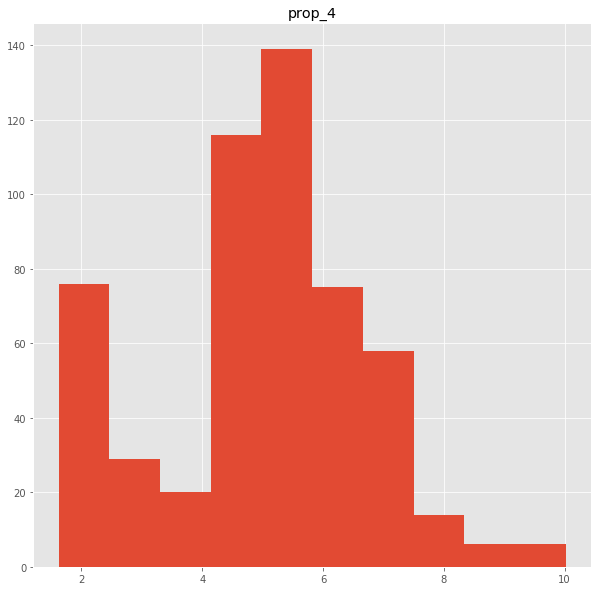

In [160]:
#Plot the histograms of the 4 numeric variables
for i in range(len(df.columns.values)-1):
    plt.figure(figsize=(10,10))
    ax = plt.hist(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.show()

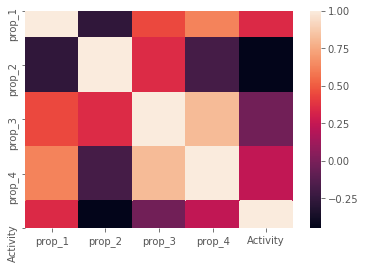

In [161]:
#plot the correlation plot
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [162]:
#Divide the data to features and labels and then split them according to holdout method (75:25)
# Specify the data 
X=df.iloc[:,:-1]

# Specify the target labels and flatten the array 
y=df.Activity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [163]:
#randomly underrsample the training data. Dont touch the validation data
rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Undersampled training dataset shape %s' % Counter(y_rus))
print('Original training dataset shape %s' % Counter(y))
print('Original validation dataset shape %s' % Counter(y_test))

Undersampled training dataset shape Counter({0: 125, 1: 125})
Original training dataset shape Counter({1: 368, 0: 171})
Original validation dataset shape Counter({1: 89, 0: 46})


In [164]:
# Define the scaler 
scaler = StandardScaler().fit(X_rus)

# Scale the train set
X_rus = scaler.transform(X_rus)

# Scale the test set
X_test = scaler.transform(X_test)

# Modeling

Model 1:  Optimizer = sgd, hidden layers = 2 (16,5), loss = binary cross entropy, activation  = relu

In [179]:
# Initialize the constructor
model = Sequential()

# Add an input layer with 20 units
model.add(Dense(20, activation='relu', input_shape=(4,)))

# Add one hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))
 
# Add another hidden layer with 5 units
model.add(Dense(5, activation='relu'))

# Add an output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_rus, y_rus, epochs=200, batch_size=1, validation_data=(X_test, y_test), verbose=0)

In [180]:
#print the training accuracy of the model after 200th epoch
score_train = model.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(250, score_train[1]*100))

#print the validation accuracy of the model after 200 th epoch
score_test = model.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(250, score_test[1]*100))
#score metric gives both loss and accuracy. I am looking at the accuracy only since it is more understandable than loss.

The training accurcay after 250 epochs is 95.600%
The validation accurcay after 250 epochs is 89.630%


In [167]:
#define a custom funcation to plot the Accuracy and Loss for epochs
def plot_the_performance(history):
    acc = np.ravel(history.history['accuracy'])*100
    val_acc = np.ravel(history.history['val_accuracy'])*100
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    #customize the plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy(%)')
    plt.plot(x, val_acc, 'r', label='Validation accuracy(%)')
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Epochs")
    plt.title('Training and Validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

The training and validation accuracy both seem to max out at 200 epochs(Reached a plateau surface). The validation accuracy seems a bit jagged and rough. Same for training and validation loss. They decrease as we increase the number of epochs. The model, however, does seem to overfit a little because we can see a difference between training and validation accuracy. But, this is due to class imbalance

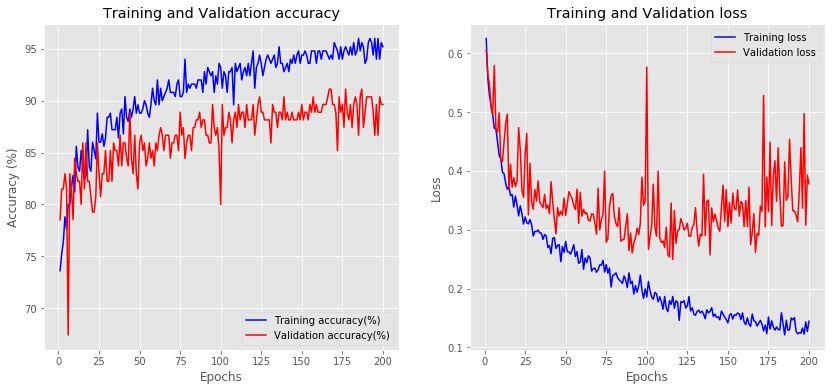

In [181]:
plot_the_performance(history)

Model 2:  Optimizer = adam, hidden layers = 2 (16,5), loss = binary cross entropy, activation  = relu

In [169]:
# Initialize the constructor
model2 = Sequential()

# Add an input layer with 20 units
model2.add(Dense(20, activation='relu', input_shape=(4,)))

# Add one hidden layer with 16 neurons
model2.add(Dense(16, activation='relu'))
 
# Add another hidden layer with 5 units
model2.add(Dense(5, activation='relu'))

# Add an output layer with sigmoid activation function
model2.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history2 = model2.fit(X_rus, y_rus,epochs=200, batch_size=1, validation_data=(X_test, y_test), verbose=0)


In [170]:
#print the training accuracy of the model after 200th epoch
score_train = model2.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(200, score_train[1]*100))

#print the validation accuracy of the model after 200 th epoch
score_test = model2.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(200, score_test[1]*100))


The training accurcay after 200 epochs is 96.800%
The validation accurcay after 200 epochs is 92.593%


The training accuracy increased but the validation accuracy seems to have increased a bit by using adam optimizer. The graphs seem to follow the same trend as previous model. The model may be overfitting too.

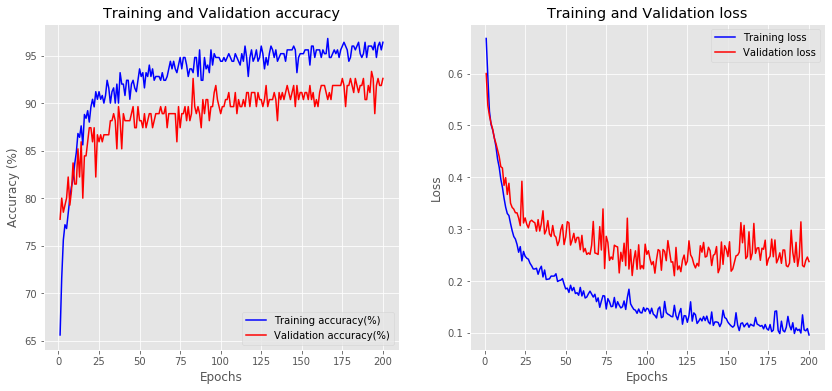

In [171]:
plot_the_performance(history2)

I will use adam optimizer as it has clearly beat sgd optimizer in the previous models.

Model 3:  Optimizer = adam, hidden layers = 3 (30,20,10), loss = binary cross entropy, activation  = relu

In [172]:
# Initialize the constructor
model3 = Sequential()

# Add an input layer with 50 units
model3.add(Dense(50, activation='relu', input_shape=(4,)))

# Add one hidden layer with 30 neurons
model3.add(Dense(30, activation='relu'))

# Add another hidden layer with 20 neurons
model3.add(Dense(20, activation='relu'))
 
# Add another hidden layer with 10 units
model3.add(Dense(10, activation='relu'))

# Add an output layer with sigmoid activation function
model3.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history3 = model3.fit(X_rus, y_rus, epochs=200, batch_size=1, validation_data=(X_test, y_test), verbose=0)

In [173]:
#print the training accuracy of the model after 200th epoch
score_train = model3.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(200, score_train[1]*100))

#print the validation accuracy of the model after 200 th epoch
score_test = model3.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(200, score_test[1]*100)) 

The training accurcay after 200 epochs is 96.000%
The validation accurcay after 200 epochs is 91.852%


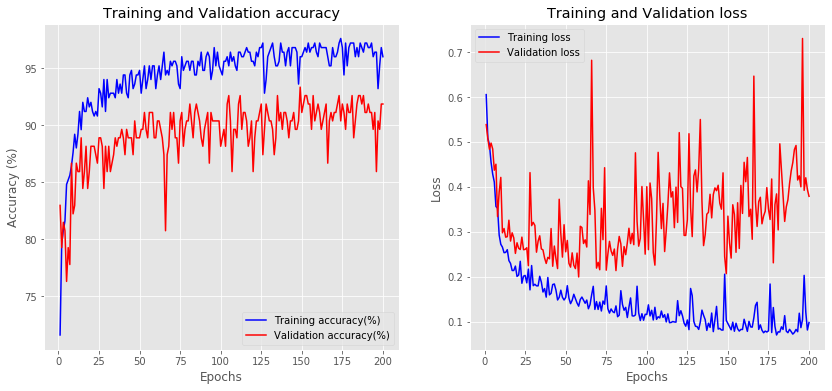

In [174]:
plot_the_performance(history3)

Model 3 has one hidden layer extra and has more neurons than model 1. But it is not more accurate than model 2. But, I will add regularization to model 3 to see if we can prevent overfitting.

Model 4:  Optimizer = adam, hidden layers = 3 (30,20,10), loss = binary cross entropy, activation  = relu, L2 regularization

In [120]:
#add L2 regularization to one of the hidden layers and use adam optmizer
model4 = keras.models.Sequential([
  keras.layers.Dense(50, activation=tf.nn.relu, input_shape=(4,)),
  keras.layers.Dense(30, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(l=0.0005)),
  keras.layers.Dense(20, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.relu), 
  keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_rus, y_rus,epochs=250, batch_size=1, validation_data=(X_test, y_test), verbose=0)

In [123]:
#print the training accuracy of the model after 200th epoch
score_train = model4.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(250, score_train[1]*100))

#print the validation accuracy of the model after 200 th epoch
score_test = model4.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(250, score_test[1]*100)) 

The training accurcay after 250 epochs is 97.200%
The validation accurcay after 250 epochs is 94.074%


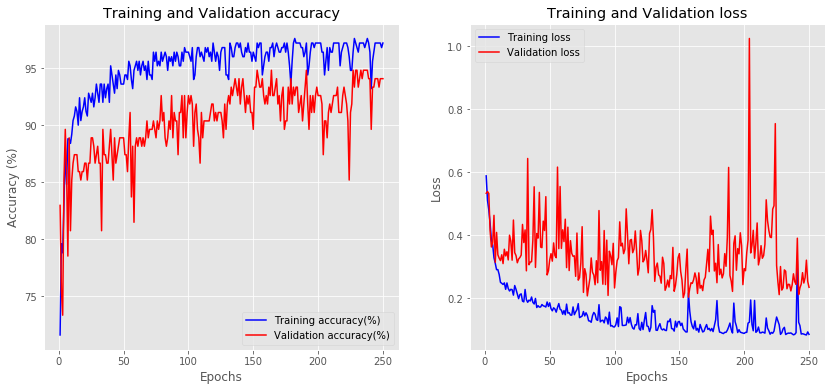

In [175]:
plot_the_performance(history4)

# Experimenting on Model 3 (Optimizer = sgd, hidden layers = 3 (30,20,10), loss = binary cross entropy, activation  = relu) with regularization terms

Param: 0.100000, Train: 86.400, Validation: 82.222
Param: 0.010000, Train: 94.000, Validation: 87.407
Param: 0.001000, Train: 95.600, Validation: 88.889
Param: 0.000100, Train: 96.400, Validation: 88.148
Param: 0.000010, Train: 97.200, Validation: 91.111
Param: 0.000001, Train: 95.200, Validation: 90.370


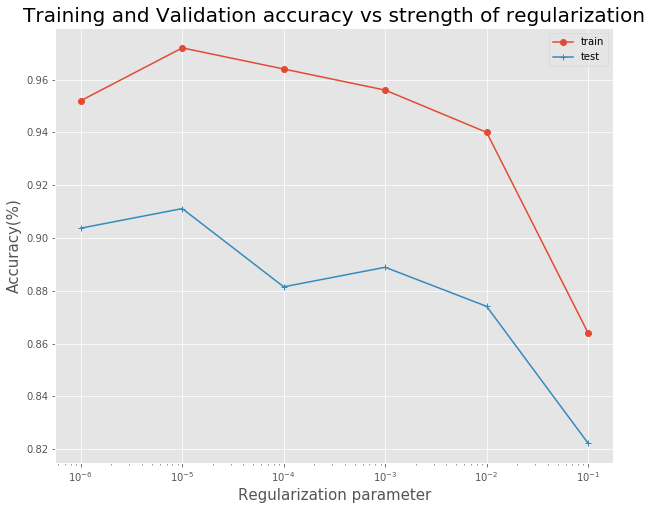

In [136]:
#Define a list of regularization strength values we want to check the model over
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
train, test = list(), list()
for param in values:
    # define model
    # Initialize the constructor
    model5 = Sequential()

# Add an input layer with 50 units
    model5.add(Dense(50, activation='relu', input_shape=(4,)))

# Add one hidden layer with 30 neurons and regularization
    model5.add(Dense(30, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(param,param)))

# Add another hidden layer with 20 neurons
    model5.add(Dense(20, activation='relu'))
 
# Add another hidden layer with 10 units
    model5.add(Dense(10, activation='relu'))

# Add an output layer with sigmoid activation function
    model5.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
    model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model5.fit(X_rus, y_rus, epochs=200, verbose=0)
	# evaluate the model
    _, train_acc = model5.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model5.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Validation: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc)
    test.append(test_acc)
# plot train and test means
plt.figure(figsize = (10,8)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='+')
plt.title("Training and Validation accuracy vs strength of regularization", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

Param: 0.100000, Train: 88.000, Validation: 83.704
Param: 0.010000, Train: 95.200, Validation: 86.667
Param: 0.001000, Train: 94.400, Validation: 90.370
Param: 0.000100, Train: 96.400, Validation: 92.593
Param: 0.000010, Train: 97.200, Validation: 89.630
Param: 0.000001, Train: 96.800, Validation: 93.333


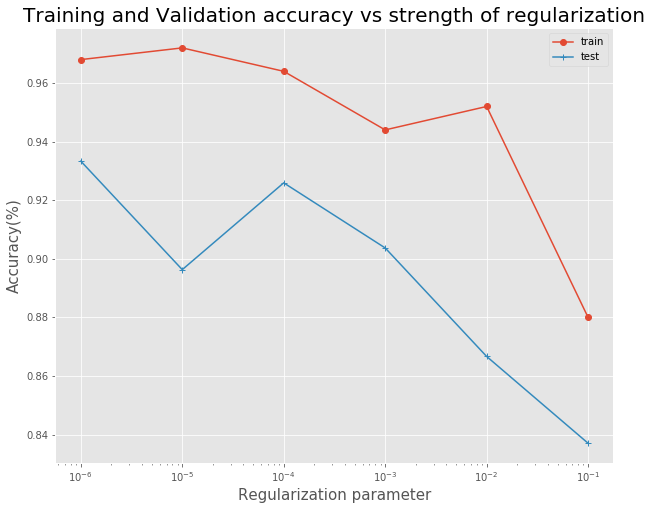

In [137]:
#Define a list of regularization strength values we want to check the model over
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
train, test = list(), list()
for param in values:
    # define model
    # Initialize the constructor
    model5 = Sequential()

# Add an input layer with 50 units
    model5.add(Dense(50, activation='relu', input_shape=(4,)))

# Add one hidden layer with 30 neurons and regularization
    model5.add(Dense(30, activation='relu',kernel_regularizer=keras.regularizers.l1(param)))

# Add another hidden layer with 20 neurons
    model5.add(Dense(20, activation='relu'))
 
# Add another hidden layer with 10 units
    model5.add(Dense(10, activation='relu'))

# Add an output layer with sigmoid activation function
    model5.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
    model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model5.fit(X_rus, y_rus, epochs=200, verbose=0)
	# evaluate the model
    _, train_acc = model5.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model5.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Validation: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc)
    test.append(test_acc)
# plot train and test means
plt.figure(figsize = (10,8)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='+')
plt.title("Training and Validation accuracy vs strength of regularization", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

Param: 0.100000, Train: 93.600, Validation: 88.889
Param: 0.010000, Train: 96.000, Validation: 91.852
Param: 0.001000, Train: 96.800, Validation: 88.889
Param: 0.000100, Train: 96.800, Validation: 88.889
Param: 0.000010, Train: 96.400, Validation: 93.333
Param: 0.000001, Train: 96.000, Validation: 91.111


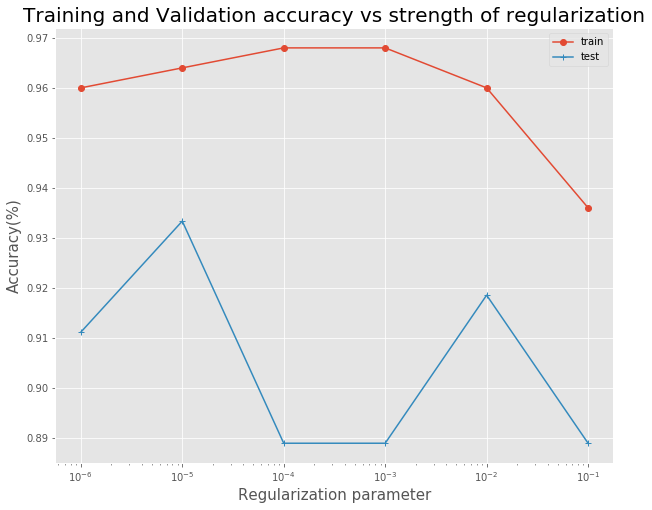

In [138]:
#Define a list of regularization strength values we want to check the model over
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
train, test = list(), list()
for param in values:
    # define model
    # Initialize the constructor
    model5 = Sequential()

# Add an input layer with 50 units
    model5.add(Dense(50, activation='relu', input_shape=(4,)))

# Add one hidden layer with 30 neurons and regularization
    model5.add(Dense(30, activation='relu',kernel_regularizer=keras.regularizers.l2(param)))

# Add another hidden layer with 20 neurons
    model5.add(Dense(20, activation='relu'))
 
# Add another hidden layer with 10 units
    model5.add(Dense(10, activation='relu'))

# Add an output layer with sigmoid activation function
    model5.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
    model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model5.fit(X_rus, y_rus, epochs=200, verbose=0)
	# evaluate the model
    _, train_acc = model5.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model5.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Validation: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc)
    test.append(test_acc)
# plot train and test means
plt.figure(figsize = (10,8)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='+')
plt.title("Training and Validation accuracy vs strength of regularization", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

Param: 0.100000, Train: 88.400, Validation: 82.963
Param: 0.010000, Train: 92.000, Validation: 85.926
Param: 0.001000, Train: 94.800, Validation: 87.407
Param: 0.000100, Train: 97.200, Validation: 89.630
Param: 0.000010, Train: 94.400, Validation: 88.148
Param: 0.000001, Train: 95.200, Validation: 90.370


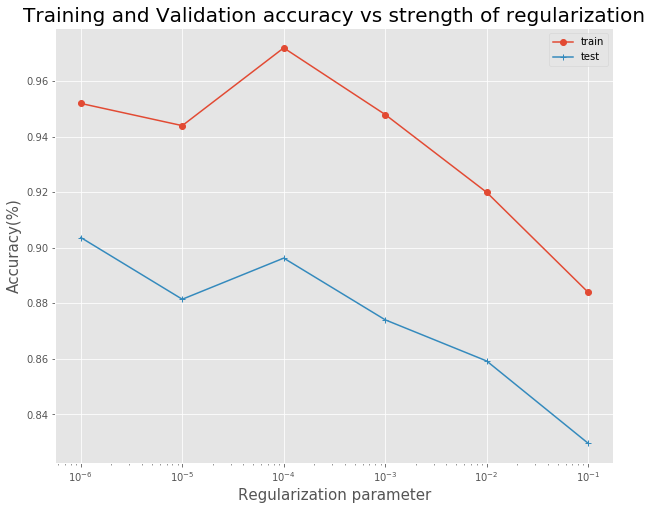

In [139]:
#Define a list of regularization strength values we want to check the model over
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
train, test = list(), list()
for param in values:
    # define model
    # Initialize the constructor
    model5 = Sequential()

# Add an input layer with 50 units
    model5.add(Dense(50, activation='relu', input_shape=(4,)))

# Add one hidden layer with 30 neurons and regularization
    model5.add(Dense(30, activation='relu',kernel_regularizer=keras.regularizers.l2(param)))

# Add another hidden layer with 20 neurons
    model5.add(Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l1(param)))
 
# Add another hidden layer with 10 units
    model5.add(Dense(10, activation='relu'))

# Add an output layer with sigmoid activation function
    model5.add(Dense(1, activation='sigmoid'))

#complile the model and run for 200 epochs
    model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model5.fit(X_rus, y_rus, epochs=200, verbose=0)
	# evaluate the model
    _, train_acc = model5.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model5.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Validation: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc)
    test.append(test_acc)
# plot train and test means
plt.figure(figsize = (10,8)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='+')
plt.title("Training and Validation accuracy vs strength of regularization", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

From the above 4 models, applying elastic net regularization and applying regularization on 2 layers is dropping the validation accuracy of the model. The highest validation accuracy is with either when we apply L1 with a value of 1e-6 or L2 with a value of 1e-5.

This shows that L1 is a stronger regularization than L2 for the same value of the parameter.